In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [2]:
fileName = "toshi_net_sales_forecast"
df = pd.read_csv(f"../RawData/{fileName}.csv")
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df.head()

,date,net_sales_total,net_order_entry_total,mitarbeiter_vertrieb,mitarbeiter_service,mitarbeiter_total,EU_INDU,EU_SERV,EU_CONS,EU_RETA,...,EU_EEI,INDU_EU_TOT_COF_BS_M,INDU_EU_TOT_1_BS_M,INDU_EU_TOT_2_BS_M,INDU_EU_TOT_3_BS_M,INDU_EU_TOT_4_BS_M,INDU_EU_TOT_5_BS_M,INDU_EU_TOT_6_BS_M,INDU_EU_TOT_7_BS_M,BCI_Euro_Area
0,2014-01-31,9914.85,13197.85,94,178,272,-3.1,4.7,-12.1,-3.0,...,96.3,-3.1,3.6,-16.7,-13.6,3.3,10.6,2.0,-3.2,0.18
1,2014-02-28,8793.66,11632.08,96,178,274,-3.0,4.6,-11.9,-1.8,...,96.4,-3.0,4.9,-16.0,-13.4,3.5,10.6,1.2,-3.8,0.21
2,2014-03-31,12689.12,14404.37,97,179,276,-2.7,6.1,-10.8,-1.4,...,98.1,-2.7,6.1,-15.5,-12.7,3.7,11.3,0.4,-3.0,0.25
3,2014-04-30,12420.60,11512.26,97,180,277,-2.4,5.8,-11.0,-1.4,...,98.2,-2.4,4.3,-13.6,-13.6,4.3,10.5,0.4,-2.5,0.22
4,2014-05-31,11825.02,11875.16,99,178,277,-3.3,5.4,-10.4,-1.9,...,97.0,-3.3,4.4,-14.4,-14.2,4.1,8.8,0.1,-2.9,0.17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   108 non-null    datetime64[ns]
 1   net_sales_total        108 non-null    float64       
 2   net_order_entry_total  108 non-null    float64       
 3   mitarbeiter_vertrieb   108 non-null    int64         
 4   mitarbeiter_service    108 non-null    int64         
 5   mitarbeiter_total      108 non-null    int64         
 6   EU_INDU                108 non-null    float64       
 7   EU_SERV                108 non-null    float64       
 8   EU_CONS                108 non-null    float64       
 9   EU_RETA                108 non-null    float64       
 10  EU_BUIL                108 non-null    float64       
 11  EU_ESI                 108 non-null    float64       
 12  EU_EEI                 108 non-null    float64       
 13  INDU_

In [4]:
df.describe()

,date,net_sales_total,net_order_entry_total,mitarbeiter_vertrieb,mitarbeiter_service,mitarbeiter_total,EU_INDU,EU_SERV,EU_CONS,EU_RETA,...,EU_EEI,INDU_EU_TOT_COF_BS_M,INDU_EU_TOT_1_BS_M,INDU_EU_TOT_2_BS_M,INDU_EU_TOT_3_BS_M,INDU_EU_TOT_4_BS_M,INDU_EU_TOT_5_BS_M,INDU_EU_TOT_6_BS_M,INDU_EU_TOT_7_BS_M,BCI_Euro_Area
count,108,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,2018-07-16 00:13:20,19222.730463,19336.142130,138.972222,279.324074,418.296296,-0.282407,7.868519,-9.586111,-0.727778,...,104.420370,-0.282407,4.300926,-7.602778,-10.682407,3.770370,10.543519,11.100000,1.985185,0.525926
min,2014-01-31 00:00:00,8793.660000,10823.270000,94.000000,177.000000,272.000000,-36.400000,-51.800000,-29.800000,-34.900000,...,53.200000,-36.400000,-51.600000,-51.500000,-51.000000,-7.000000,-58.000000,-9.600000,-32.100000,-2.730000
25%,2016-04-22 12:00:00,14482.412500,14961.810000,104.000000,198.000000,302.000000,-3.450000,6.100000,-11.075000,-3.075000,...,100.575000,-3.450000,1.925000,-14.500000,-14.525000,1.775000,7.700000,0.175000,-3.000000,0.150000
50%,2018-07-15 12:00:00,18386.505000,17867.795000,132.500000,287.500000,419.500000,-1.650000,11.650000,-7.150000,1.200000,...,105.850000,-1.650000,5.100000,-9.400000,-11.450000,4.800000,10.550000,5.550000,1.250000,0.435000
75%,2020-10-07 18:00:00,22562.037500,22146.357500,172.250000,357.250000,529.000000,4.925000,14.200000,-5.600000,2.900000,...,111.050000,4.925000,10.025000,2.575000,-2.375000,5.950000,15.500000,11.725000,8.000000,1.182500
max,2022-12-31 00:00:00,43826.610000,38654.390000,189.000000,385.000000,571.000000,12.900000,19.500000,-2.100000,6.700000,...,115.800000,12.900000,18.100000,10.600000,5.400000,15.300000,22.800000,58.300000,16.600000,1.820000
std,NaN,6794.204022,6004.630749,33.698625,76.206658,109.650273,7.689437,11.904398,6.409564,6.677243,...,9.226544,7.689437,10.038091,12.264914,11.055745,4.201207,9.457097,16.797124,7.961353,0.858482


# Total Number of Features 


In [5]:
print("Total Number of Features :", len(list(df)))
# list(df)

Total Number of Features : 22


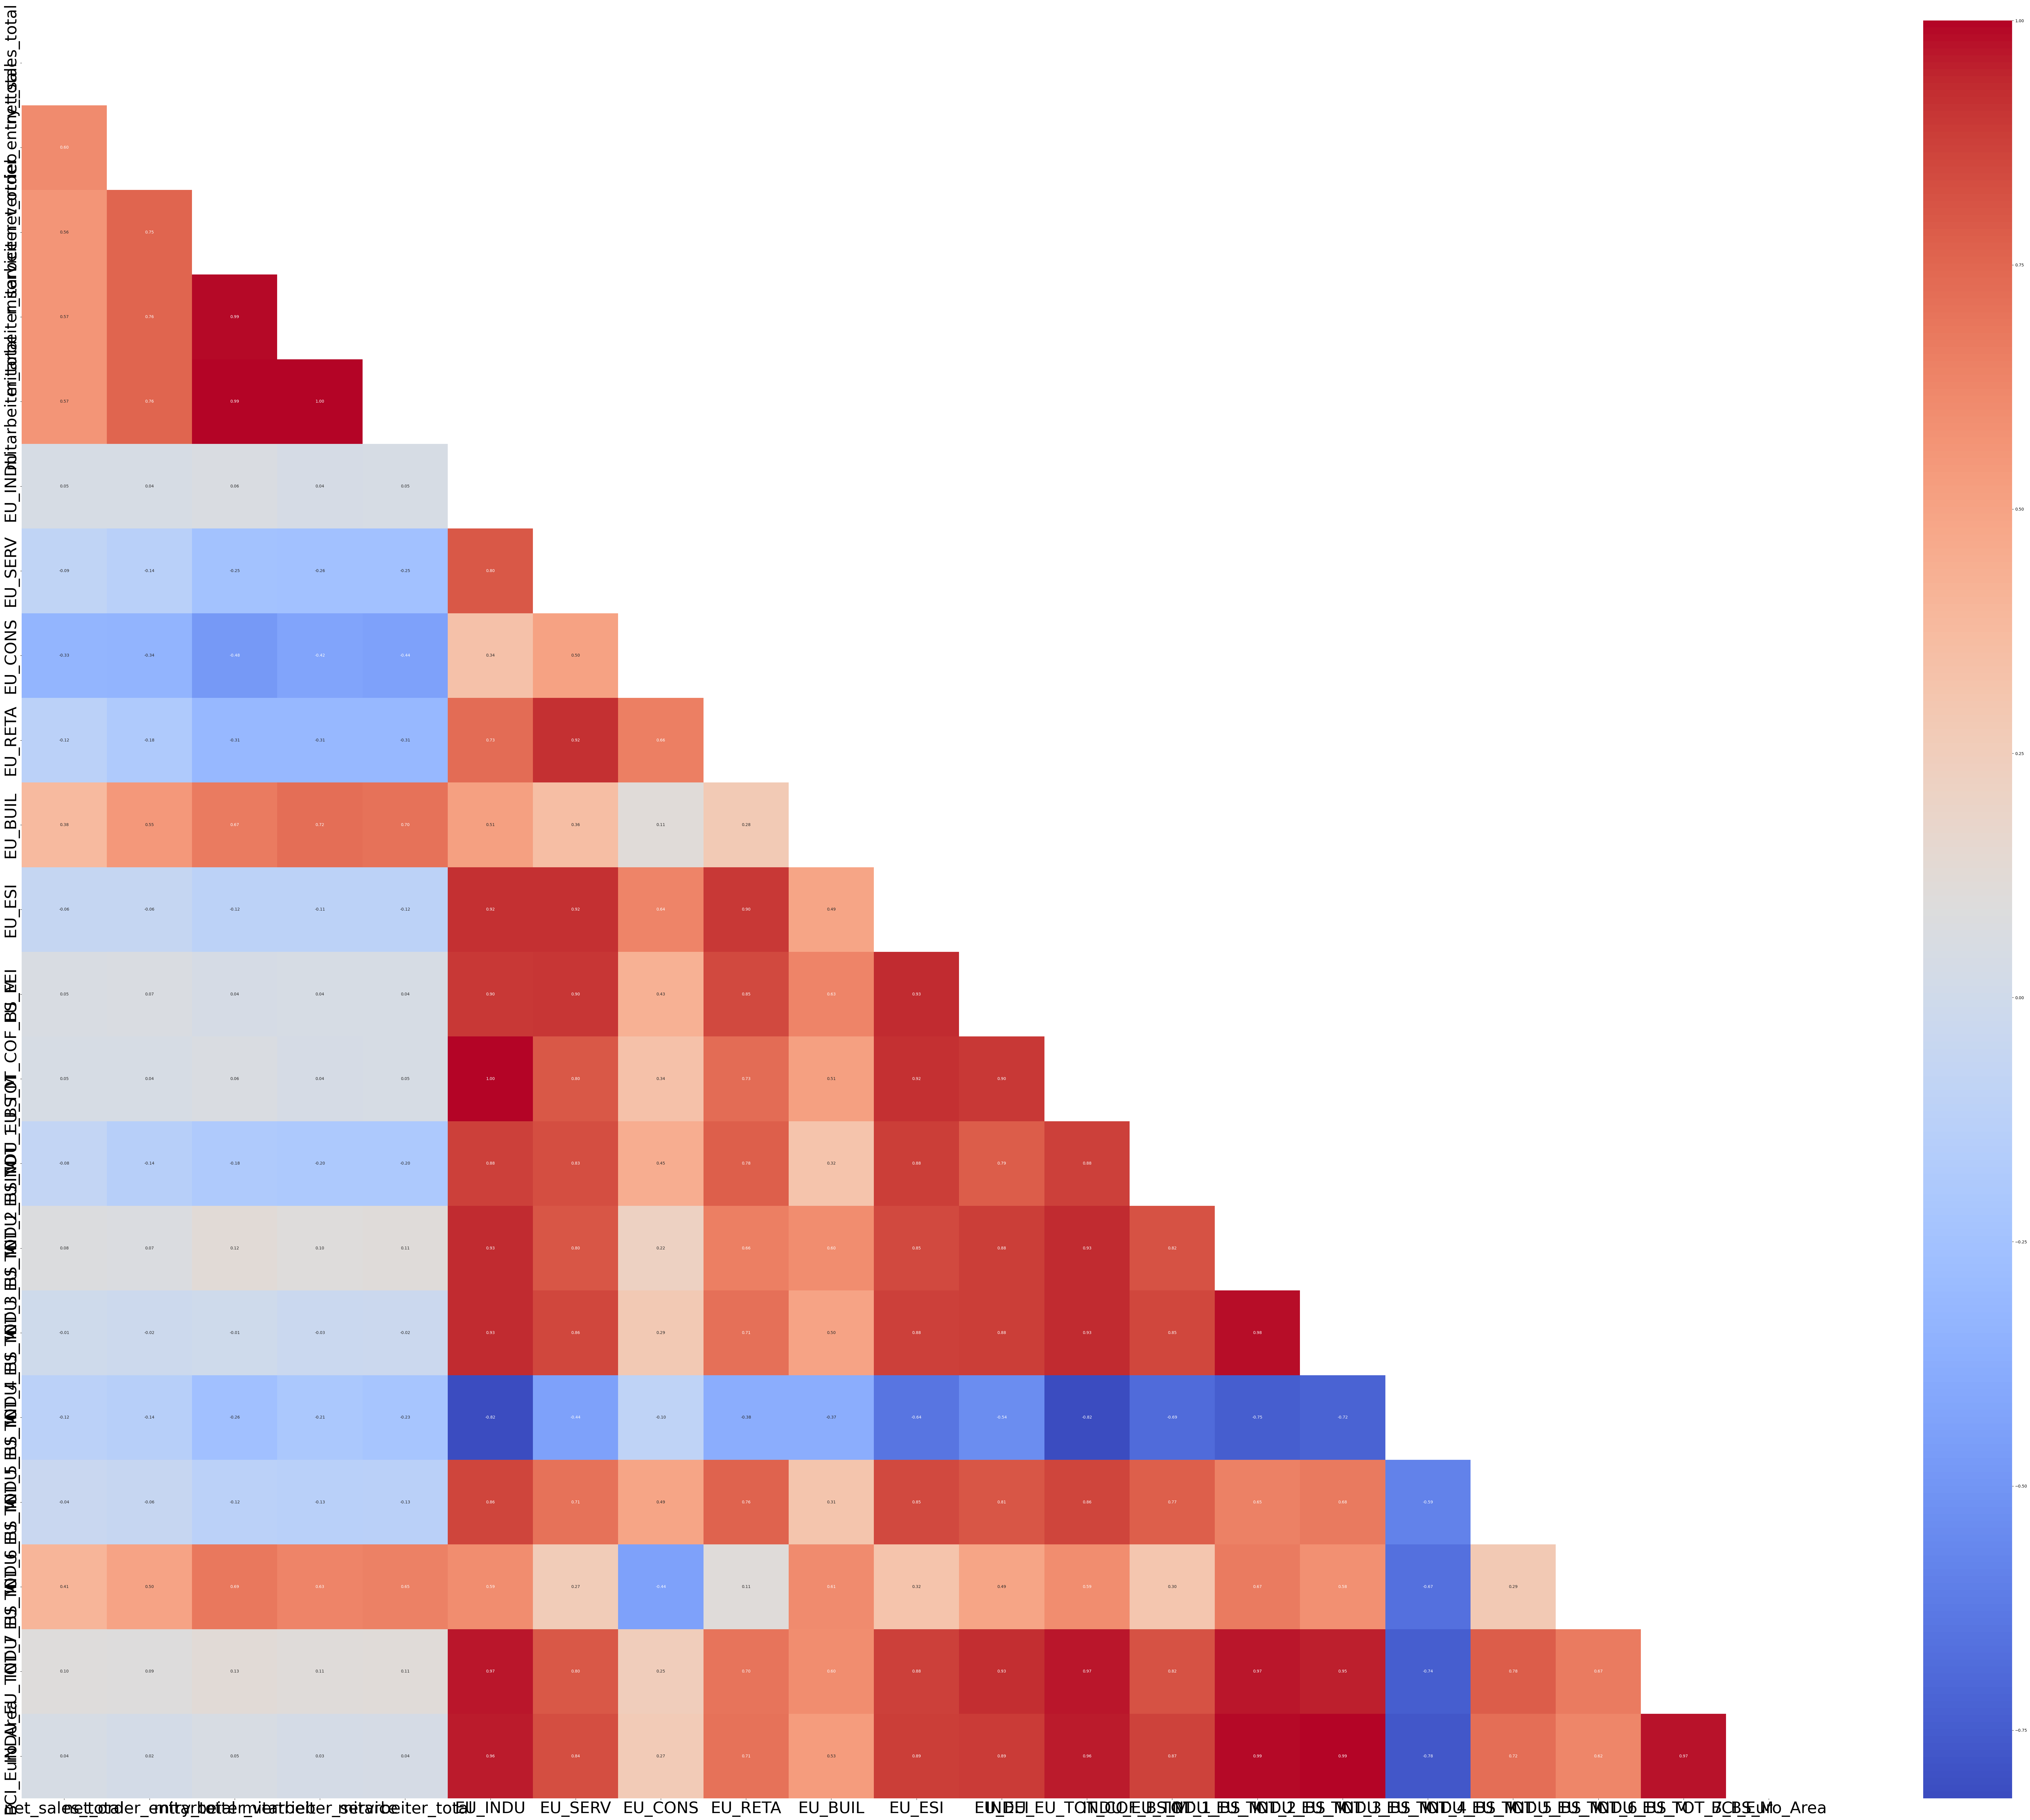

In [6]:
without_time_col_df = df.iloc[:, 1:]
# Compute the correlation matrix
correlation_matrix = without_time_col_df.corr()

# Create a mask to hide values less than or equal to 0.9
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10 * 10, 8 * 10))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    xticklabels=without_time_col_df.columns,
    yticklabels=without_time_col_df.columns,
    mask=mask,
    # annot_kws={"size": 24}  # Increase the font size to 12
)
# Increase the font size of x-axis and y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=40)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=40)
plt.show()

# Features that has high correlation with the Target Variable(net_sales_total)

In [7]:
without_time_col_df

,net_sales_total,net_order_entry_total,mitarbeiter_vertrieb,mitarbeiter_service,mitarbeiter_total,EU_INDU,EU_SERV,EU_CONS,EU_RETA,EU_BUIL,...,EU_EEI,INDU_EU_TOT_COF_BS_M,INDU_EU_TOT_1_BS_M,INDU_EU_TOT_2_BS_M,INDU_EU_TOT_3_BS_M,INDU_EU_TOT_4_BS_M,INDU_EU_TOT_5_BS_M,INDU_EU_TOT_6_BS_M,INDU_EU_TOT_7_BS_M,BCI_Euro_Area
0,9914.85,13197.85,94,178,272,-3.1,4.7,-12.1,-3.0,-25.3,...,96.3,-3.1,3.6,-16.7,-13.6,3.3,10.6,2.0,-3.2,0.18
1,8793.66,11632.08,96,178,274,-3.0,4.6,-11.9,-1.8,-24.9,...,96.4,-3.0,4.9,-16.0,-13.4,3.5,10.6,1.2,-3.8,0.21
2,12689.12,14404.37,97,179,276,-2.7,6.1,-10.8,-1.4,-24.6,...,98.1,-2.7,6.1,-15.5,-12.7,3.7,11.3,0.4,-3.0,0.25
3,12420.60,11512.26,97,180,277,-2.4,5.8,-11.0,-1.4,-25.4,...,98.2,-2.4,4.3,-13.6,-13.6,4.3,10.5,0.4,-2.5,0.22
4,11825.02,11875.16,99,178,277,-3.3,5.4,-10.4,-1.9,-25.2,...,97.0,-3.3,4.4,-14.4,-14.2,4.1,8.8,0.1,-2.9,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,26062.56,29621.98,186,372,558,1.2,8.1,-26.2,-5.2,1.8,...,107.1,1.2,-0.7,0.8,-5.3,4.8,7.6,43.0,7.0,0.87
104,27195.69,21720.32,185,378,563,-0.4,6.1,-29.8,-7.0,-0.6,...,106.2,-0.4,-0.2,-0.1,-6.8,4.4,3.1,46.9,5.6,0.84
105,27263.05,21349.68,188,379,567,-1.5,4.2,-28.8,-6.0,0.4,...,104.8,-1.5,-0.6,-1.9,-7.2,6.9,4.4,43.1,5.1,0.78
106,35235.09,26340.08,184,379,563,-2.0,4.4,-25.1,-5.9,0.1,...,106.1,-2.0,-4.5,-4.2,-9.9,7.7,5.7,38.9,5.6,0.57


In [8]:
# Assuming you have a DataFrame called 'df' with your data
# Compute the correlation matrix
correlation_matrix = without_time_col_df.corr()

# Specify the threshold correlation value
threshold = 0.5

# Get the column names that meet the threshold condition
correlated_columns = []
for column in correlation_matrix.columns:
    if (
        column != "net_sales_total"
        and abs(correlation_matrix["net_sales_total"][column]) >= threshold
    ):
        correlated_columns.append(column)

print(
    f"Columns with a correlation of {threshold} or higher with 'net_sales_total':",
    correlated_columns,
)

Columns with a correlation of 0.5 or higher with 'net_sales_total': ['net_order_entry_total', 'mitarbeiter_vertrieb', 'mitarbeiter_service', 'mitarbeiter_total']


In [9]:
correlated_columns.insert(0, "date")
correlated_columns.insert(1, "net_sales_total")
highcorrelated_features = "highcorrelated_features"
os.makedirs("../ProcessedData/highcorrelated_features", exist_ok=True)
Sample = df[correlated_columns]
Sample.to_csv(
    f"../ProcessedData/{highcorrelated_features}/{highcorrelated_features}.csv",
    index=False,
)

# Visualization

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def plot_scatter(df, filename=None):
    number_of_colums_required = len(list(df)) - 1

    fig = make_subplots()

    for index, features in enumerate(list(df)):
        if features == "date":
            continue

        fig.add_trace(
            go.Scatter(
                x=df["date"], y=df[features], mode="markers+lines", name=features
            )
        )

    fig.update_layout(
        title="Scatter Plot of Quantity and Revenue vs Date",
        height=600,
        width=1200,
        font_size=14,
    )
    fig.update_yaxes(title_text="net_sales_total")
    fig.show()
    fig.write_html(f"../Plots/{filename}.html")

In [18]:
# Plottting the features only that have high correlation
filename = "InteractivePlot_high_correlated_Features"
plot_scatter(Sample, filename)


# Plottting all the features
filename = "InteractivePlot_all_features"
plot_scatter(df, filename)